![breast cancer detection](https://i.ytimg.com/vi/NSSOyhJBmWY/maxresdefault.jpg)

### Data Set Information:

This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.
    
> Sources:
   - Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin USA
   - Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   - Date: 15 July 1992
    
> Class distribution:
   - Benign: 458 (65.5%)
   - Malignant: 241 (34.5%)

| Data Set Characteristics | Number of Instances | Area | Attribute Characteristics | Number of Attributes | Date Donated | Associated Tasks | Missing Values | Number of Web Hits |
|--------------------------|---------------------|------|---------------------------|----------------------|--------------|------------------|----------------|--------------------|
| Multivariate             | 699                 | Life | Integer                   | 10                   | 1992-07-15   | classification   | yes            | 699043             |

<h2 align="center">Attribute Information:</h2>

   |  Attribute          |           Domain  |
   |---------------------- | ------------------- |
   | 1. Sample code number       |      id number| 
   | 2. Clump Thickness               1 - 10 | 
   | 3. Uniformity of Cell Size   |     1 - 10 | 
   | 4. Uniformity of Cell Shape  |     1 - 10 |
   | 5. Marginal Adhesion   |           1 - 10 |
   | 6. Single Epithelial Cell Size |   1 - 10 |
   | 7. Bare Nuclei      |              1 - 10 |
   | 8. Bland Chromatin    |            1 - 10 |
   | 9. Normal Nucleoli      |          1 - 10 |
   | 10. Mitoses             |           1 - 10 |
   | 11. Class:              |           (2 for benign, 4 for malignant) |

### Install required liabraries

In [1]:
#! pip install numpy
#! pip install pandas
#! pip install matplotlib
#! pip install seaborn
#! pip install -U scikit-learn
#! pip install scipy

### Import some liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#! pip install pyforest
from pyforest import *
lazy_imports()

['import plotly.graph_objs as go',
 'from dask import dataframe as dd',
 'import gensim',
 'from sklearn.ensemble import RandomForestClassifier',
 'import statistics',
 'import glob',
 'from pathlib import Path',
 'import tqdm',
 'import xgboost as xgb',
 'import plotly.express as px',
 'import spacy',
 'import numpy as np',
 'import lightgbm as lgb',
 'import matplotlib.pyplot as plt',
 'import re',
 'from sklearn.ensemble import RandomForestRegressor',
 'import os',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import pickle',
 'import pandas as pd',
 'import seaborn as sns',
 'import pydot',
 'import sklearn',
 'from openpyxl import load_workbook',
 'from sklearn import svm',
 'import tensorflow as tf',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from pyspark import SparkContext',
 'import matplotlib as mpl',
 'import altair as alt',
 'import plotly as py',
 'import sys',
 'import awswrangler as wr'

### Import our data set

In [4]:
data = pd.read_csv("breast_cancer_data.csv", sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
data.head()

<IPython.core.display.Javascript object>

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.shape

(699, 11)

In [6]:
data.describe()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
data['class']

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [9]:
data['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [10]:
bare_nuclei = pd.DataFrame(data['bare_nuclei'].str.isdigit())
bare_nuclei.value_counts()

<IPython.core.display.Javascript object>

bare_nuclei
True           683
False           16
dtype: int64

In [11]:
data[data['bare_nuclei'] == '?' ]

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [12]:
df = data.replace('?', np.nan)
df['bare_nuclei'].value_counts()

<IPython.core.display.Javascript object>

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [13]:
df.median()

id                             1171710.0
clump_thickness                      4.0
uniformity_of_cell_size              1.0
uniformity_of_cell_shape             1.0
marginal_adhesion                    1.0
single_epithelial cell_size          2.0
bare_nuclei                          1.0
bland_chromatin                      3.0
normal_nucleoli                      1.0
mitoses                              1.0
class                                2.0
dtype: float64

In [14]:
df = df.fillna(df.median())

In [15]:
df.dtypes

id                              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

In [16]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [17]:
df.dtypes

id                             int64
clump_thickness                int64
uniformity_of_cell_size        int64
uniformity_of_cell_shape       int64
marginal_adhesion              int64
single_epithelial cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

#### Data Analysis

In [18]:
df.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
df.drop('id', axis = 1, inplace = True)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
uniformity_of_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uniformity_of_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
single_epithelial cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

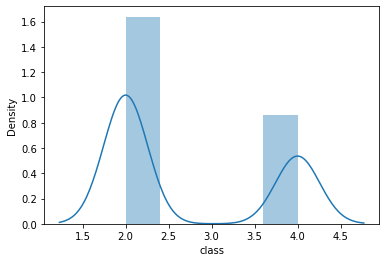

In [21]:
sns.distplot(df['class'])

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'uniformity_of_cell_size'}>,
        <AxesSubplot:title={'center':'uniformity_of_cell_shape'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'single_epithelial cell_size'}>,
        <AxesSubplot:title={'center':'bare_nuclei'}>],
       [<AxesSubplot:title={'center':'bland_chromatin'}>,
        <AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

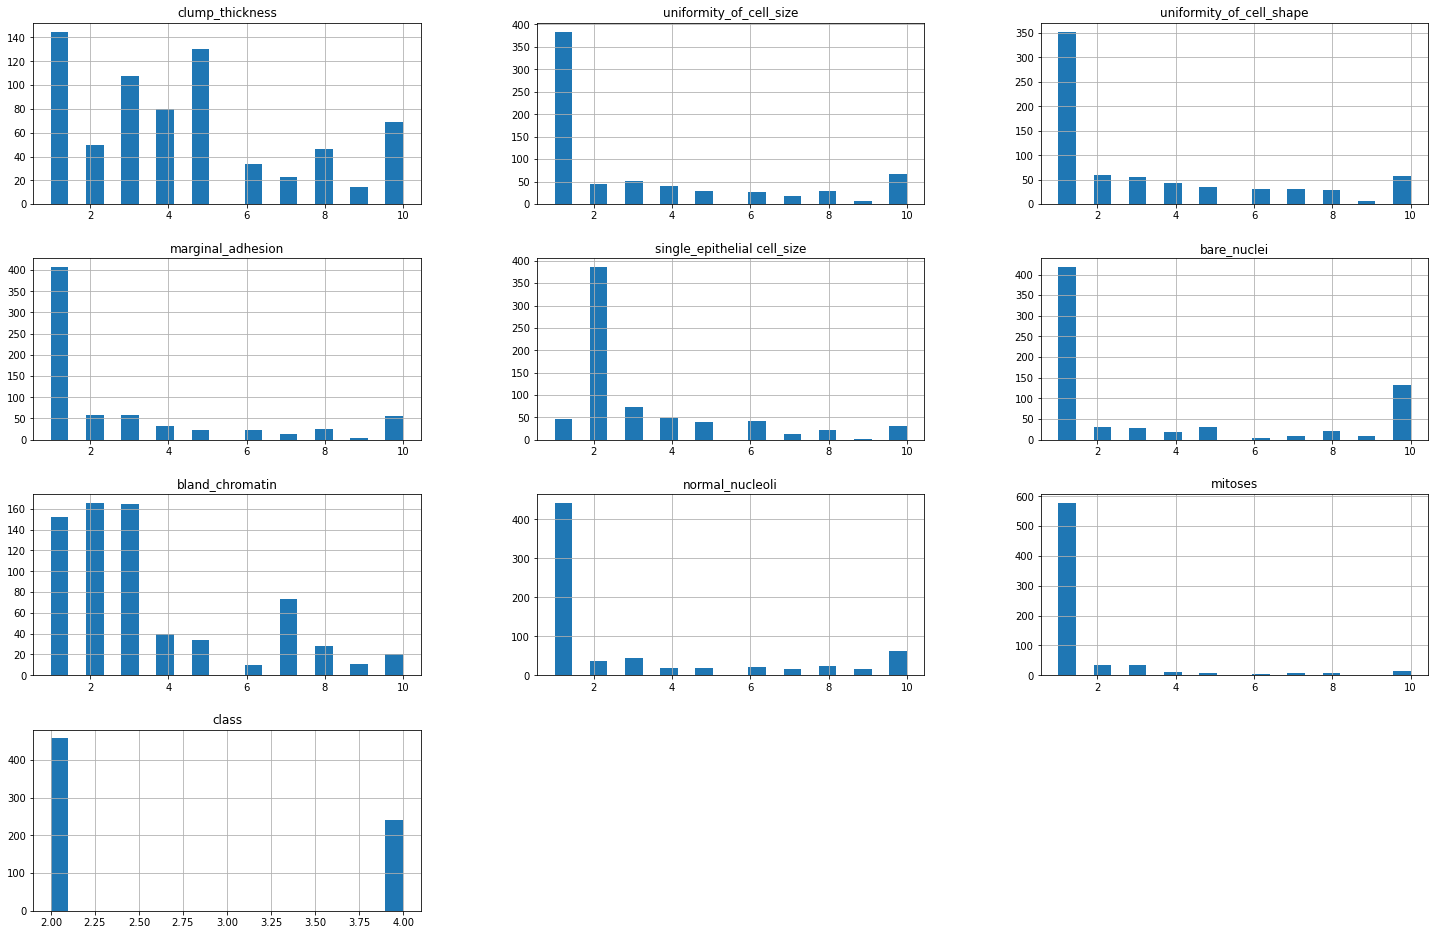

In [22]:
df.hist(bins = 20, figsize = (25, 25), layout = (6,3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

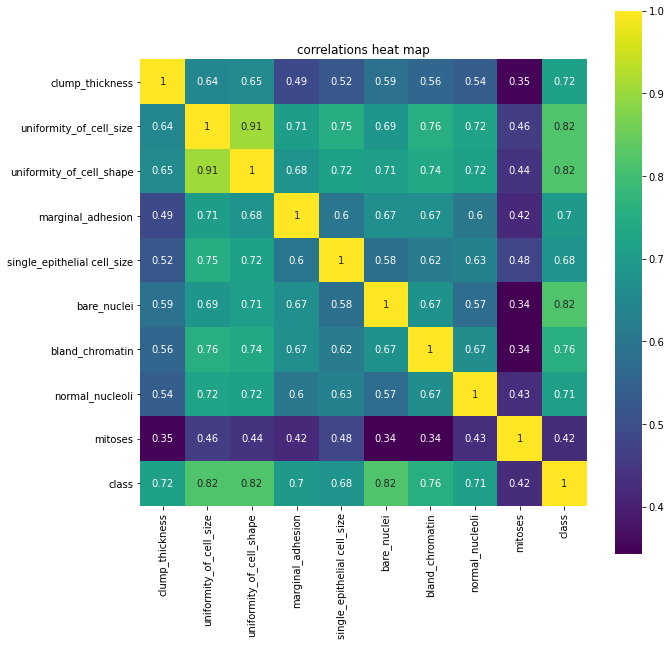

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title('correlations heat map')
plt.show()

<IPython.core.display.Javascript object>

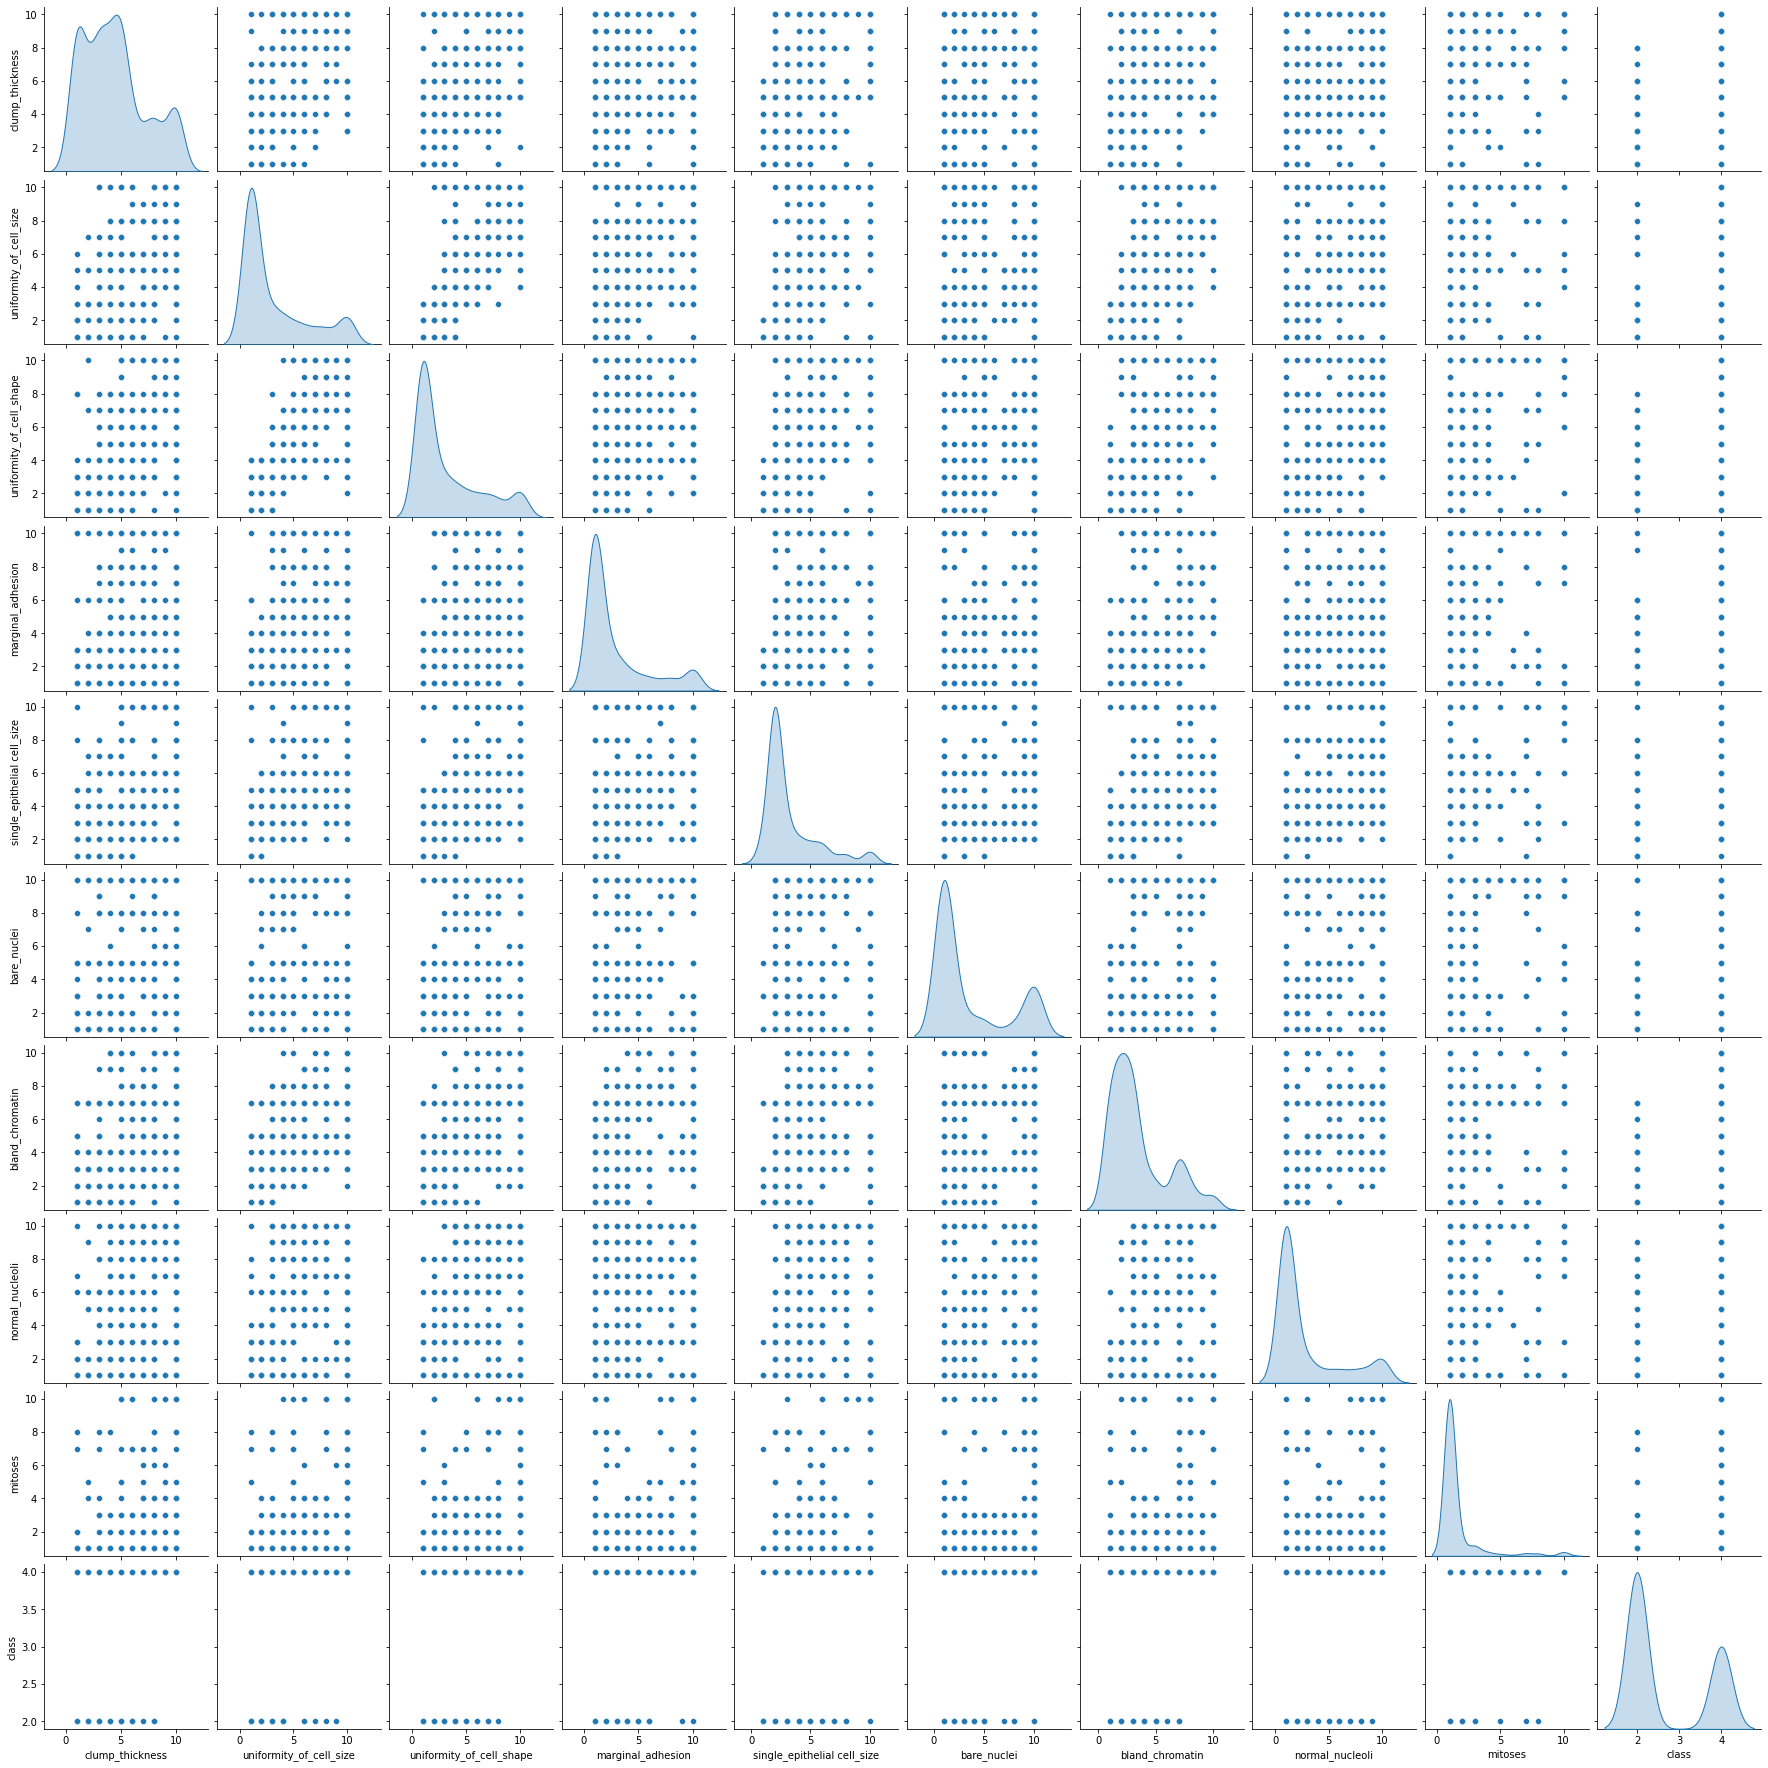

In [24]:
sns.pairplot(df, diag_kind = 'kde')

#### Build model

In [25]:
X = df.drop('class', axis = 1)
y = df['class']
X.shape, y.shape

((699, 9), (699,))

In [26]:
#y = y.values.reshape(-1,1)
#X.shape, y.shape

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((489, 9), (489,), (210, 9), (210,))

#### K-neighbors classification

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
KNN = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [32]:
knn_predict = KNN.predict(x_test)
print('predicted class value: ')
knn_predict

predicted class value: 


array([4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2], dtype=int64)

In [33]:
print('actual class value: ')
actual_value = np.array(y_test)
actual_value

actual class value: 


<IPython.core.display.Javascript object>

array([4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2], dtype=int64)

In [34]:
from scipy.stats import zscore
print('KNN predion score :{0: 2g}%'.format(KNN.score(x_test, y_test)*100))

KNN predion score : 94.7619%


#### Support vector machine

In [35]:
from sklearn.svm import SVC

In [36]:
SVC = SVC()
SVC.fit(x_train, y_train)

SVC()

In [37]:
print('SVM prediction')
svm_predict = SVC.predict(x_test)
svm_predict

SVM prediction


array([4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2], dtype=int64)

In [38]:
from scipy.stats import zscore
print('SVM predion score :{0: 2g}%'.format(SVC.score(x_test, y_test)*100))

SVM predion score : 95.7143%


In [39]:
knn_predict = pd.DataFrame(knn_predict)
svm_predict = pd.DataFrame(svm_predict)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
new_df = pd.concat([knn_predict, svm_predict], axis = 1)
new_df.columns = [['knn_predict', 'svm_predict']]
new_df

<IPython.core.display.Javascript object>

,knn_predict,svm_predict
0,4,4
1,4,4
2,4,4
3,2,2
4,4,4
...,...,...
205,4,4
206,4,4
207,4,4
208,4,4


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predict))
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       128
           4       0.95      0.91      0.93        82

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

              precision    recall  f1-score   support

           2       0.98      0.95      0.96       128
           4       0.93      0.96      0.95        82

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



In [42]:
from sklearn import metrics

Confusion matrics for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

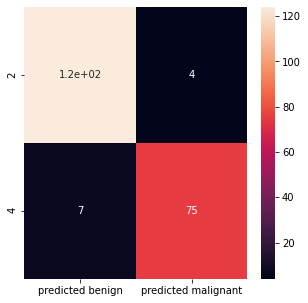

In [43]:
print('Confusion matrics for KNN')
cm = metrics .confusion_matrix(y_test, knn_predict, labels = [2, 4])
df_cm = pd.DataFrame(cm, index = [i for i in [2, 4]], columns = [i for i in ['predicted benign', 'predicted malignant']])
plt.figure(figsize = (5, 5))
sns.heatmap(df_cm, annot = True)

Confusion matrics for SVM


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

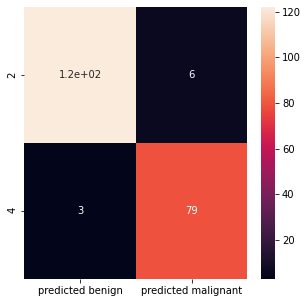

In [44]:
print('Confusion matrics for SVM')
cm = metrics.confusion_matrix(y_test, svm_predict, labels = [2, 4])
df_cm = pd.DataFrame(cm, index = [i for i in [2, 4]], columns = [i for i in ['predicted benign', 'predicted malignant']])
plt.figure(figsize = (5, 5))
sns.heatmap(df_cm, annot = True)